Using the FT Global 500 data in the file ```FTGlobal.xls```:

1. Extract three clusters from the top 20 companies by market value that have complete data for each row. Use the following features: `Value`, `Turnover`, `Income`,    `Assets`,     `PE`,  `Yield`
2. Group the data by cluster and calculate the mean of the features
3. What do the clusters mean?
4. Change the number of clusters to 2 and then to 4. Does your interpretation of the data change?


In [8]:
import pandas as pd
import altair as alt
from sklearn.cluster import KMeans, DBSCAN
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [9]:
data=pd.read_excel('data/FTGlobal.xls', skiprows=4)

In [10]:
data.head()

,Global rank 2015,Global rank 2014,Company,Country,Market value $m,Sector,Turnover $m,Net income $m,Total assets $m,Employees,Price $,P/e ratio,Dividend yield (%),Year End
0,1.0,1.0,Apple,US,724773.1,Technology hardware & equipment,182795,39510.0,231839.0,92600.0,124.430,19.291473,1.454633,2014-09-27
1,2.0,2.0,Exxon Mobil,US,356548.7,Oil & gas producers,364763,32520.0,349493.0,75300.0,85.000,11.198946,3.176471,2014-12-31
2,3.0,5.0,Berkshire Hathaway,US,356510.7,Nonlife insurance,N/R,19872.0,526186.0,316000.0,217500.000,17.987709,NaN,2014-12-31
3,4.0,4.0,Google,US,345849.2,Software & computer services,66001,14444.0,131133.0,53600.0,554.700,26.389153,NaN,2014-12-31
4,5.0,3.0,Microsoft,US,333524.8,Software & computer services,86833,22074.0,172384.0,128000.0,40.655,15.458175,2.754889,2014-06-30


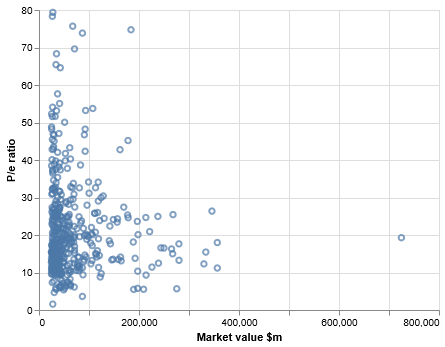

In [11]:
alt.Chart(data).mark_point().encode(x='Market value $m', y='P/e ratio')

In [13]:
data['mv'] = data['Market value $m'] / data['Market value $m'].max()
data['pe'] = data['P/e ratio'] / data['P/e ratio'].max()

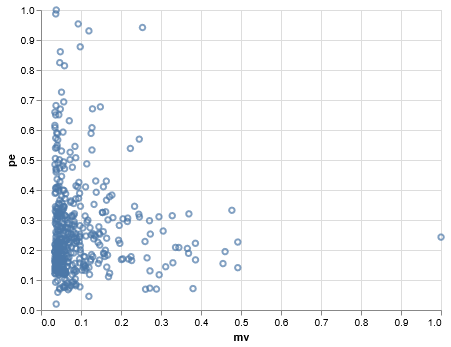

In [14]:
alt.Chart(data).mark_point().encode(x='mv', y='pe')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


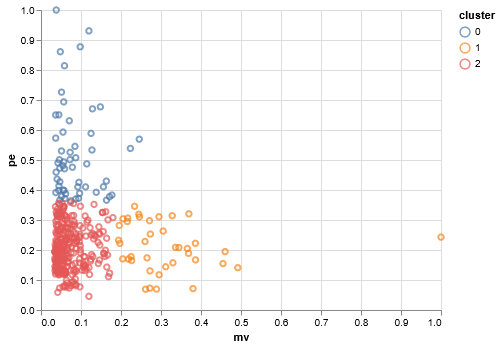

In [19]:
kmeans = KMeans(3)
data=data.dropna()
X = data[['mv', 'pe']]
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
                              
data['cluster'] = y_kmeans
alt.Chart(data).mark_point().encode(x='mv', y='pe', color='cluster:N')
